# **Processing**

After Basic Processing & EDA of Dataset(EPL_DATA), from the eda result we added new features to dataset including Home_Overall_rating, Away_Overall_rating, Head to Head Results.

In [ ]:
# Loading dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
le =LabelEncoder()

df = pd.read_excel("/content/EPL_processed1.xlsx")
print("Initial Data:\n", df.head())
print("\n Shape of data: ", df.shape)

Initial Data:
   Div       Date      Time    HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  \
0  E0 2021-08-13  20:00:00   Brentford         Arsenal     2     0   H     1   
1  E0 2021-08-14  12:30:00  Man United           Leeds     5     1   H     1   
2  E0 2021-08-14  15:00:00     Burnley        Brighton     1     2   A     1   
3  E0 2021-08-14  15:00:00     Chelsea  Crystal Palace     3     0   H     2   
4  E0 2021-08-14  15:00:00     Everton     Southampton     3     1   H     0   

   HTAG  ... Result  HomeTeamCode  AwayTeamCode      time  hour  RefereeCode  \
0     0  ...      1             3             0  20:00:00    20           22   
1     0  ...      1            16            11  12:30:00    12           26   
2     0  ...      2             5             4  15:00:00    15            7   
3     0  ...      1             6             7  15:00:00    15           14   
4     1  ...      1             8            21  15:00:00    15            1   

   HomeTeam_Form_Score 

In [ ]:
# Drop columns unavailable before match
drop_cols = ['FTHG', 'FTAG', 'HTHG', 'HTAG','FTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'Div', 'Time']
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')


Getting a better edge from B365 data

In [ ]:
def get_b365_result(row):
    if row['B365H'] <= row['B365D'] and row['B365H'] <= row['B365A']:
        return 1
    elif row['B365D'] <= row['B365H'] and row['B365D'] <= row['B365A']:
        return 0
    elif row['B365A'] <= row['B365H'] and row['B365A'] <= row['B365D']:
        return 2
    else:
        return -1 # Handle cases where values are equal or other conditions

df['B365_result'] = df.apply(get_b365_result, axis=1)

display(df[['B365H', 'B365D', 'B365A', 'B365_result','Result']].head())

,B365H,B365D,B365A,B365_result,Result
0,4.00,3.40,1.95,2,1
1,1.53,4.50,5.75,1,1
2,3.10,3.10,2.45,2,2
3,1.25,5.75,13.00,1,1
4,1.90,3.50,4.00,1,1


In [ ]:
# Compare 'Result' and 'B365_result' columns
matches = (df['Result'] == df['B365_result']).sum()

# Calculate the percentage of matches
total_rows = len(df)
percentage_match = (matches / total_rows) * 100

print(f"Number of matches between 'Result' and 'B365_result': {matches}")
print(f"Total number of rows: {total_rows}")
print(f"Percentage of matches: {percentage_match:.2f}%")

Number of matches between 'Result' and 'B365_result': 892
Total number of rows: 1579
Percentage of matches: 56.49%


In [ ]:
df.describe()

,Date,B365H,B365D,B365A,Result,HomeTeamCode,AwayTeamCode,hour,RefereeCode,HomeTeam_Form_Score,AwayTeam_Form_Score,HomeTeam_Overall_Rating,AwayTeam_Overall_Rating,B365_result
count,1579,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000
mean,2023-08-03 18:04:19.911336448,2.871406,4.294984,4.456460,1.090564,12.023433,12.012666,15.936669,17.371121,0.630146,-0.540849,0.439096,0.439067,1.369221
min,2021-01-11 00:00:00,1.060000,2.800000,1.140000,0.000000,0.000000,0.000000,12.000000,0.000000,-5.000000,-5.000000,0.111000,0.111000,1.000000
25%,2022-08-13 00:00:00,1.620000,3.500000,2.200000,1.000000,5.000000,5.000000,15.000000,5.000000,-1.000000,-2.000000,0.362000,0.362000,1.000000
50%,2023-08-10 00:00:00,2.250000,3.800000,3.200000,1.000000,12.000000,12.000000,15.000000,19.000000,1.000000,-1.000000,0.415000,0.415000,1.000000
75%,2024-09-03 00:00:00,3.250000,4.500000,5.250000,2.000000,18.500000,18.000000,17.000000,27.000000,2.000000,1.000000,0.507000,0.507000,2.000000
max,2025-12-04 00:00:00,19.000000,13.000000,29.000000,2.000000,26.000000,26.000000,20.000000,37.000000,5.000000,5.000000,0.740000,0.740000,2.000000
std,NaN,2.054474,1.358595,3.776627,0.739116,8.044322,8.038317,2.300557,11.734454,2.309676,2.158797,0.152143,0.152157,0.482747


In [ ]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'Referee', 'B365H', 'B365D', 'B365A',
       'Result', 'HomeTeamCode', 'AwayTeamCode', 'time', 'hour', 'RefereeCode',
       'HomeTeam_Form_Score', 'AwayTeam_Form_Score', 'HomeTeam_Overall_Rating',
       'AwayTeam_Overall_Rating', 'B365_result'],
      dtype='object')

In [ ]:
df.dtypes

,0
Date,datetime64[ns]
HomeTeam,object
AwayTeam,object
Referee,object
B365H,float64
B365D,float64
B365A,float64
Result,int64
HomeTeamCode,int64
AwayTeamCode,int64


In [ ]:
print("Initial Data:\n", df.head(20))
print("\n Shape of data: ", df.shape)

Initial Data:
          Date        HomeTeam        AwayTeam     Referee  B365H  B365D  \
0  2021-08-13       Brentford         Arsenal    M Oliver   4.00   3.40   
1  2021-08-14      Man United           Leeds   P Tierney   1.53   4.50   
2  2021-08-14         Burnley        Brighton     D Coote   3.10   3.10   
3  2021-08-14         Chelsea  Crystal Palace      J Moss   1.25   5.75   
4  2021-08-14         Everton     Southampton    A Madley   1.90   3.50   
5  2021-08-14       Leicester          Wolves    C Pawson   1.66   3.80   
6  2021-08-14         Watford     Aston Villa      M Dean   3.10   3.20   
7  2021-08-14         Norwich       Liverpool  A Marriner   9.00   5.75   
8  2021-08-15       Newcastle        West Ham  M Atkinson   3.20   3.50   
9  2021-08-15       Tottenham        Man City    A Taylor   5.50   4.20   
10 2021-08-21       Liverpool         Burnley      M Dean   1.18   7.50   
11 2021-08-21     Aston Villa       Newcastle     D Coote   1.80   3.75   
12 2021-08

**Head To Head Results**

In [ ]:
# Check required columns
required_cols = ['HomeTeam', 'AwayTeam', 'Result']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing column: {col}")

# Dictionary to store past head-to-head results
h2h_dict = {}

def get_h2h_stats(home, away):
    """Return (home_form, away_form) based on previous head-to-head history."""
    pair = tuple(sorted([home, away]))
    if pair not in h2h_dict:
        return 0, 0  # No history yet

    past_results = h2h_dict[pair]  # Last 5 encounters

    # Convert past results into +1 (home win), -1 (away win), 0 (draw)
    home_score, away_score = 0, 0
    for match in past_results:
        h, a, res = match
        if res == 1 and h == home:  # Home team won
            home_score += 1
        elif res == 2 and a == home:  # Away team won (so home lost)
            away_score += 1
        elif res == 0:
            home_score += 0.5
            away_score += 0.5
    return home_score, away_score

# Generate H2H form columns
home_form, away_form = [], []

for _, row in df.iterrows():
    home, away, result = row['HomeTeam'], row['AwayTeam'], row['Result']

    # Get head-to-head form before this match
    h_form, a_form = get_h2h_stats(home, away)
    home_form.append(h_form)
    away_form.append(a_form)

    # Update head-to-head dictionary
    pair = tuple(sorted([home, away]))
    if pair not in h2h_dict:
        h2h_dict[pair] = []
    h2h_dict[pair].append((home, away, result))

# Add columns to DataFrame
df['H2H_HomeForm'] = home_form
df['H2H_AwayForm'] = away_form

print("Added 'H2H_HomeForm' and 'H2H_AwayForm' columns to EPL_with_H2H_form.csv")


Added 'H2H_HomeForm' and 'H2H_AwayForm' columns to EPL_with_H2H_form.csv


In [ ]:
display(df[['H2H_HomeForm','H2H_AwayForm','B365_result','Result']].tail(20))

,H2H_HomeForm,H2H_AwayForm,B365_result,Result
1559,3.5,2.5,1,1
1560,5.0,2.0,1,1
1561,2.0,2.0,1,0
1562,0.5,0.5,2,0
1563,1.0,3.0,2,2
1564,0.5,0.5,1,2
1565,4.0,2.0,2,1
1566,2.5,1.5,1,1
1567,3.0,3.0,1,0
1568,0.0,0.0,2,0


In [ ]:
df.shape

(1579, 20)

In [ ]:
df.to_csv("EPL_processed.csv", index=False)
print("DF saved to EPL_processed.csv")

DF saved to EPL_processed.csv


## **Models RFC, SVM, Logistic Regression**
*   Uses only the 8 chosen predictors that matter most before the match.
*   Date-based split (no data leakage + Best for predicting Future Match).
*   Applies scaling to normalize odds/rating values.
*   Prints accuracy, precision, confusion matrix, and feature importance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

rf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)

predictors = ['B365H', 'B365A', 'HomeTeam_Overall_Rating', 'B365D','RefereeCode', 'AwayTeam_Form_Score', 'AwayTeam_Overall_Rating', 'HomeTeam_Form_Score']

train = df[df["Date"] < "2024-08-15"]
test = df[df["Date"] >= "2024-08-15"]

rf.fit(train[predictors], train["Result"])
y_preds = rf.predict(test[predictors])
x_preds = rf.predict(train[predictors])

acc = accuracy_score(test["Result"],y_preds)
prec = precision_score(test["Result"], y_preds, average='weighted')
cm = confusion_matrix(test["Result"], y_preds)

acc2 = accuracy_score(train["Result"],x_preds)
prec2 = precision_score(train["Result"], x_preds, average='weighted')
cm = confusion_matrix(train["Result"], x_preds)

print(" *** Random Forest (Selected Predictors) Evaluation **")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(test["Result"], y_preds))
print(f"Accuracy: {acc2:.3f}")
print(f"Precision: {prec2:.3f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(train["Result"], x_preds))


 *** Random Forest (Selected Predictors) Evaluation **
Accuracy: 0.519
Precision: 0.489

Confusion Matrix:
 [[218  38   7]
 [  0 528   8]
 [  0  41 315]]

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.06      0.10       103
           1       0.50      0.87      0.64       168
           2       0.60      0.44      0.51       153

    accuracy                           0.52       424
   macro avg       0.47      0.46      0.42       424
weighted avg       0.49      0.52      0.46       424

Accuracy: 0.919
Precision: 0.926

Confusion Matrix:
 [[218  38   7]
 [  0 528   8]
 [  0  41 315]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91       263
           1       0.87      0.99      0.92       536
           2       0.95      0.88      0.92       356

    accuracy                           0.92      1155
   macro avg       0.94      0.90      0.92 

# **Random Forest Classifier**

---



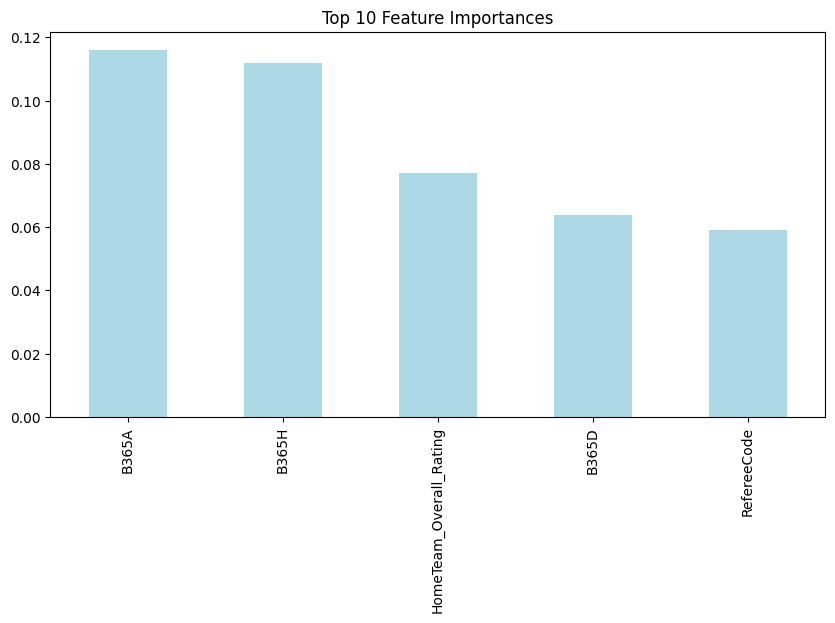

--- RFC Model Evaluation (Time-based Split) ---
Accuracy: 0.512
Precision: 0.512

Confusion Matrix:
 [[ 18  63  22]
 [ 20 140   8]
 [ 26  68  59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.17      0.22       103
           1       0.52      0.83      0.64       168
           2       0.66      0.39      0.49       153

    accuracy                           0.51       424
   macro avg       0.49      0.46      0.45       424
weighted avg       0.51      0.51      0.48       424

--- RFC Model Evaluation (Time-based Split) Training ---
Accuracy: 1.000
Precision: 1.000

Confusion Matrix:
 [[263   0   0]
 [  0 536   0]
 [  0   0 356]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       536
           2       1.00      1.00      1.00       356

    accuracy                           1.00     

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Step 2: Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 3: Drop rows with missing dates
df = df.dropna(subset=['Date'])

# Step 4: Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Split data based on date (before/after 2025-08-15)
train_df = df[df['Date'] < '2024-08-15']
test_df = df[df['Date'] >= '2024-08-15']

# Define features and target
X_train = train_df.drop(['Result', 'Date'], axis=1)
y_train = train_df['Result']
X_test = test_df.drop(['Result', 'Date'], axis=1)
y_test = test_df['Result']

# Train initial Random Forest model
rfc = RandomForestClassifier(n_estimators=300,max_depth=10, random_state=42)
rfc.fit(X_train, y_train)

# Important Features
importances = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
top_features = importances.head(20).index.tolist()

# Plot feature importance
plt.figure(figsize=(10, 5))
importances.head().plot(kind='bar', color='lightblue')
plt.title('Top 10 Feature Importances')
plt.show()

# Retrain model using top features
rfc_best = RandomForestClassifier(n_estimators=300, random_state=42)
rfc_best.fit(X_train[top_features], y_train)

# Evaluate model
y_pred = rfc_best.predict(X_test[top_features])
rfc_acc = accuracy_score(y_test, y_pred)
rfc_prec = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

#Training
x_pred = rfc_best.predict(X_train[top_features])
acc2 = accuracy_score(y_train, x_pred)
prec2 = precision_score(y_train, x_pred, average='weighted')
cm2 = confusion_matrix(y_train, x_pred)

print("--- RFC Model Evaluation (Time-based Split) ---")
print(f"Accuracy: {rfc_acc:.3f}")
print(f"Precision: {rfc_prec:.3f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("--- RFC Model Evaluation (Time-based Split) Training ---")
print(f"Accuracy: {acc2:.3f}")
print(f"Precision: {prec2:.3f}")
print("\nConfusion Matrix:\n", cm2)
print("\nClassification Report:\n", classification_report(y_train, x_pred))

print("\nTop Features used:")
print(top_features)

## Model Building and Implementation

Based on the code cells above, the following models have been applied:

*   **Random Forest Classifier:** This ensemble method was chosen likely for its ability to handle non-linear relationships and provide feature importance. The code demonstrates training, evaluating with a time-based split, and using feature importance for potential feature selection.
*   **Support Vector Machine (SVM):** SVMs are effective for classification tasks and work well in high-dimensional spaces. The code applies scaling to the features before training the SVM, which is a common and necessary preprocessing step for this algorithm.
*   **Logistic Regression:** This is a simple yet powerful linear model for binary and multiclass classification. The code implements a multiclass logistic regression and explores L1 and L2 regularization as well as handling imbalanced classes with SMOTE.

**Train-Test Split and Cross-Validation:**

A time-based train-test split has been used to evaluate the models on future data, which is crucial for time-series data like this. Additionally, K-Fold cross-validation has been performed on the Random Forest model to provide a more robust estimate of its performance.

**Feature Selection and Regularization:**

Feature selection was performed using the feature importances from the initial Random Forest model. The top features were then used to train the subsequent models. Regularization techniques (L1 and L2) were applied to the Logistic Regression model to help prevent overfitting. SMOTE was also applied to the training data for the Logistic Regression model to address potential class imbalance.

## Model Evaluation

To evaluate the performance of the trained models, the following metrics were used:

*   **Accuracy:** The proportion of correctly classified instances.
*   **Precision:** The ability of the model to return only relevant instances.
*   **Recall:** The ability of the model to find all the relevant instances.
*   **F1-score:** The harmonic mean of precision and recall, providing a single metric that balances both.
*   **Confusion Matrix:** A table that summarizes the performance of a classification model, showing the counts of true positive, true negative, false positive, and false negative predictions.

These metrics are calculated for each model using a time-based split to assess performance on unseen future data. A comparison of the models based on Accuracy and Precision is presented below.

In [ ]:
# Summarize results
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Logistic Regression'],
    'Accuracy': [rfc_acc, svm_acc, log_acc],
    'Precision': [rfc_prec, svm_prec, log_prec]
})

print(" Model Comparison (Same Predictors, Date Split)")
print(results)

# Visualization
plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['Accuracy'], color=['lightgreen','skyblue','lightcoral'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['Precision'], color=['lightgreen','skyblue','lightcoral'])
plt.title("Model Precision Comparison")
plt.ylabel("Precision")
plt.ylim(0, 0.7)
plt.show()

# Print detailed report for best model
best_model_name = results.loc[results['Accuracy'].idxmax(), 'Model']
print(f"\n🏆 Best Model Based on Accuracy: {best_model_name}\n")

# **Support Vector Machine**

---



In [ ]:
from sklearn.svm import SVC

# Split dataset (before & after 2025-08-15)
train_df = df[df['Date'] < '2024-08-15']
test_df = df[df['Date'] >= '2024-08-15']

# Define features and target
X_train = train_df.drop(['Result', 'Date'], axis=1)
y_train = train_df['Result']
X_test = test_df.drop(['Result', 'Date'], axis=1)
y_test = test_df['Result']


# Scale the features (SVM requires scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[top_features])
X_test_scaled = scaler.transform(X_test[top_features])

# Train SVM model
svm_model = SVC(kernel='rbf', C=3, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, y_pred)
svm_prec = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

#TRAINING
x_pred = svm_model.predict(X_train_scaled)
acc2 = accuracy_score(y_train, x_pred)
prec2 = precision_score(y_train, x_pred, average='weighted')
cm2 = confusion_matrix(y_train, x_pred)

# Display results
print("--- SVM Model Evaluation (Time-based Split) ---")
print(f"Accuracy: {svm_acc:.3f}")
print(f"Precision: {svm_prec:.3f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("--- SVM Model Train Evaluation (Time-based Split) for training ---")
print(f"Accuracy: {acc2:.3f}")
print(f"Precision: {prec2:.3f}")
print("\nConfusion Matrix:\n", cm2)
print("\nClassification Report:\n", classification_report(y_train, x_pred))

--- SVM Model Evaluation (Time-based Split) ---
Accuracy: 0.519
Precision: 0.489

Confusion Matrix:
 [[ 22  60  21]
 [ 21 135  12]
 [ 19  78  56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.21      0.27       103
           1       0.49      0.80      0.61       168
           2       0.63      0.37      0.46       153

    accuracy                           0.50       424
   macro avg       0.49      0.46      0.45       424
weighted avg       0.51      0.50      0.47       424

--- SVM Model Train Evaluation (Time-based Split) for training ---
Accuracy: 0.703
Precision: 0.728

Confusion Matrix:
 [[ 80 115  68]
 [ 11 460  65]
 [  2  82 272]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.30      0.45       263
           1       0.70      0.86      0.77       536
           2       0.67      0.76      0.71       356

    accuracy                          

# **Logistic Regression**

---



In [ ]:
from sklearn.linear_model import LogisticRegression

# Split dataset based on date
train_df = df[df['Date'] < '2025-08-15']
test_df = df[df['Date'] >= '2025-08-15']

# Define features and target
X_train = train_df.drop(['Result', 'Date'], axis=1)
y_train = train_df['Result']
X_test = test_df.drop(['Result', 'Date'], axis=1)
y_test = test_df['Result']

# Scale features (Logistic regression needs normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[top_features])
X_test_scaled = scaler.transform(X_test[top_features])

# Train Logistic Regression model (multiclass)
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = log_reg.predict(X_test_scaled)
log_acc = accuracy_score(y_test, y_pred)
log_prec = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

#Training accuracy
x_pred = log_reg.predict(X_train_scaled)
acc2 = accuracy_score(y_train, x_pred)
prec2 = precision_score(y_train, x_pred, average='weighted')
cm2 = confusion_matrix(y_train, x_pred)

# Step 10: Results
print(" *** Logistic Regression (Multiclass) Evaluation *** ")
print(f"Accuracy: {log_acc:.3f}")
print(f"Precision: {log_prec:.3f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("**Logistic Regression (Multiclass) Evaluation for Training**")
print(f"Accuracy: {acc2:.3f}")
print(f"Precision: {prec2:.3f}")
print("\nConfusion Matrix:\n", cm2)
print("\nClassification Report:\n", classification_report(y_train, x_pred))


 *** Logistic Regression (Multiclass) Evaluation *** 
Accuracy: 0.468
Precision: 0.452

Confusion Matrix:
 [[ 2 15  7]
 [ 1 24  5]
 [ 2 12 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.08      0.14        24
           1       0.47      0.80      0.59        30
           2       0.48      0.44      0.46        25

    accuracy                           0.47        79
   macro avg       0.45      0.44      0.40        79
weighted avg       0.45      0.47      0.41        79

**Logistic Regression (Multiclass) Evaluation for Training**
Accuracy: 0.578
Precision: 0.504

Confusion Matrix:
 [[  6 208 128]
 [ 12 555 107]
 [  7 171 306]]

Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.02      0.03       342
           1       0.59      0.82      0.69       674
           2       0.57      0.63      0.60       484

    accuracy                           0.58    

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# **Comparing Best Model**

---



 Model Comparison (Same Predictors, Date Split)
                 Model  Accuracy  Precision
0        Random Forest  0.511792   0.512230
1                  SVM  0.502358   0.509186
2  Logistic Regression  0.468354   0.451572


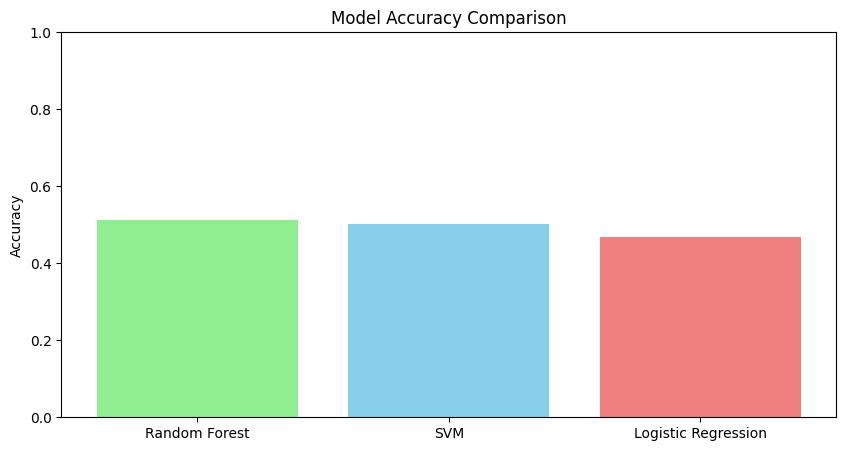

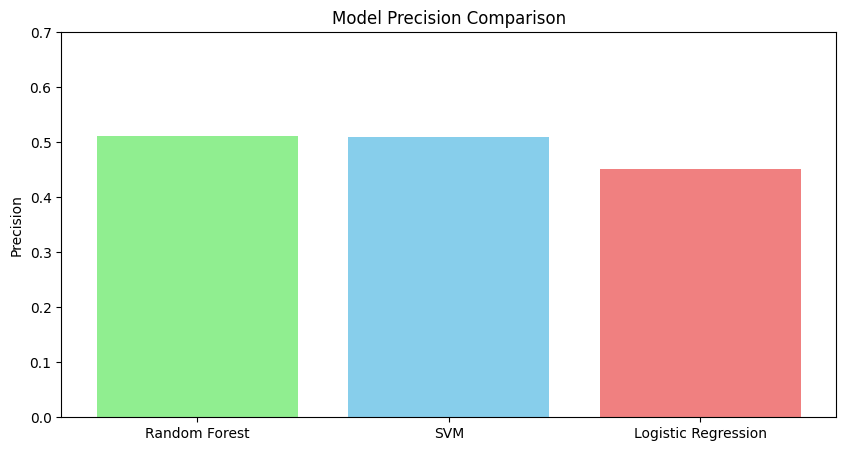


🏆 Best Model Based on Accuracy: Random Forest



In [ ]:
# Summarize results
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Logistic Regression'],
    'Accuracy': [rfc_acc, svm_acc, log_acc],
    'Precision': [rfc_prec, svm_prec, log_prec]
})

print(" Model Comparison (Same Predictors, Date Split)")
print(results)

# Visualization
plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['Accuracy'], color=['lightgreen','skyblue','lightcoral'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['Precision'], color=['lightgreen','skyblue','lightcoral'])
plt.title("Model Precision Comparison")
plt.ylabel("Precision")
plt.ylim(0, 0.7)
plt.show()

# Print detailed report for best model
best_model_name = results.loc[results['Accuracy'].idxmax(), 'Model']
print(f"\n🏆 Best Model Based on Accuracy: {best_model_name}\n")

# **K-Fold Validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=3, shuffle=True, random_state=42)

accuracies = []
predictors = ['B365H', 'B365A', 'HomeTeam_Overall_Rating', 'B365D','RefereeCode', 'AwayTeam_Form_Score', 'AwayTeam_Overall_Rating', 'HomeTeam_Form_Score']

for fold, (train_index, test_index) in enumerate(kf.split(df)):
    print(f"Fold {fold+1}")
    train_fold = df.iloc[train_index]
    test_fold = df.iloc[test_index]

    rfc_best.fit(train_fold[predictors], train_fold["Result"])
    preds = rf.predict(test_fold[predictors])

    acc = accuracy_score(test_fold["Result"], preds)
    accuracies.append(acc)
    print(f"Accuracy for Fold {fold+1}: {acc}")

print(f"\nAverage Accuracy: {np.mean(accuracies)}")

Fold 1
Accuracy for Fold 1: 0.8311195445920304
Fold 2
Accuracy for Fold 2: 0.7984790874524715
Fold 3
Accuracy for Fold 3: 0.8041825095057035

Average Accuracy: 0.8112603805167352


# **RandomSearchedCV**
For best Features

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(1, 500),
              'min_samples_split': randint(1, 200)}

random_search = RandomizedSearchCV(rfc_best, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

random_search.fit(df[predictors], df["Result"])

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Best parameters found:  {'min_samples_split': 107, 'n_estimators': 72}
Best cross-validation score:  0.5661683745228049


Updating Random Forest parameters, suggested from RandomSearchCv

In [ ]:
# Split data based on date (before/after 2024-08-15)
train_df = df[df['Date'] < '2024-08-15']
test_df = df[df['Date'] >= '2024-08-15']

# Define features and target
X_train = train_df.drop(['Result', 'Date'], axis=1)
y_train = train_df['Result']
X_test = test_df.drop(['Result', 'Date'], axis=1)
y_test = test_df['Result']

# Train initial Random Forest model
rfc = RandomForestClassifier(n_estimators=107,max_depth=72, random_state=42)
rfc.fit(X_train, y_train)

# Important Features
importances = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
top_features = importances.head(20).index.tolist()

# Retrain model using top features
rfc_best = RandomForestClassifier(n_estimators=107, max_depth=72, random_state=42)
rfc_best.fit(X_train[top_features], y_train)

# Evaluate model
y_pred = rfc_best.predict(X_test[top_features])
rfc_acc = accuracy_score(y_test, y_pred)
rfc_prec = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

#Training
x_pred = rfc_best.predict(X_train[top_features])
acc2 = accuracy_score(y_train, x_pred)
prec2 = precision_score(y_train, x_pred, average='weighted')
cm2 = confusion_matrix(y_train, x_pred)

print("--- RFC Model Evaluation (Time-based Split) ---")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("--- RFC Model Evaluation (Time-based Split) Training ---")
print(f"Accuracy: {acc2:.3f}")
print(f"Precision: {prec2:.3f}")
print("\nConfusion Matrix:\n", cm2)
print("\nClassification Report:\n", classification_report(y_train, x_pred))

print("\nTop Features used:")
print(top_features)

import joblib
joblib.dump(rfc_best, "match_predictor.pkl")
print("Model saved to match_predictor.pkl")


--- RFC Model Evaluation (Time-based Split) ---
Accuracy: 0.804
Precision: 0.489

Confusion Matrix:
 [[ 16  64  23]
 [ 18 137  13]
 [ 28  65  60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.16      0.19       103
           1       0.52      0.82      0.63       168
           2       0.62      0.39      0.48       153

    accuracy                           0.50       424
   macro avg       0.47      0.45      0.44       424
weighted avg       0.49      0.50      0.47       424

--- RFC Model Evaluation (Time-based Split) Training ---
Accuracy: 1.000
Precision: 1.000

Confusion Matrix:
 [[263   0   0]
 [  0 536   0]
 [  0   0 356]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       536
           2       1.00      1.00      1.00       356

    accuracy                           1.00     

# Overfitting

Overfitting occurs when your model learns the training data too well, including the noise and outliers, which can lead to poor performance on unseen data. Here are some common techniques to overcome overfitting:

*   **Cross-validation:** This helps you get a more reliable estimate of your model's performance on unseen data and identify if overfitting is occurring. K-Fold cross-validation is a common method.
*   **More Data:** Providing more training data can help the model generalize better and reduce the impact of noise in the existing data.
*   **Feature Selection:** Reducing the number of features or selecting the most important ones can help simplify the model and prevent it from learning too much from irrelevant or noisy features. You've already done some of this by selecting the top features based on importance.
*   **Regularization:** Techniques like L1 and L2 regularization add a penalty to the model's objective function based on the magnitude of the coefficients. This discourages the model from assigning too much importance to any single feature.
*   **Imbalanced Class:** Class weights are used in machine learning when you have an imbalanced dataset, meaning that some classes have significantly fewer samples than others. In such cases, models tend to be biased towards the majority class, leading to poor performance on the minority class.
Class weights address this by assigning different weights to the samples of each class during training. The idea is to give more importance to the minority class samples so that the model pays more attention to them. This helps to prevent the model from simply predicting the majority class all the time and improves its ability to correctly classify instances of the minority class.

# **Regularization**

Regularization is a technique applied to the model during training, not directly to the dataset. It helps prevent the model from overfitting by adding a penalty to the loss function based on the complexity of the model.

You can regularize your models by tuning hyperparameters that control their complexity, as discussed in the previous markdown cell regarding the Random Forest Classifier. For linear models like Logistic Regression and SVM, you can use L1 or L2 regularization by setting the `penalty` parameter.

Would you like me to demonstrate how to apply L1 or L2 regularization to the Logistic Regression or SVM models you've already trained?

In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming 'df' is your DataFrame and 'top_features' are already defined
# Split dataset based on date
train_df = df[df['Date'] < '2023-08-15']
test_df = df[df['Date'] >= '2023-08-15']

# Define features and target
X_train = train_df.drop(['Result', 'Date'], axis=1)
y_train = train_df['Result']
X_test = test_df.drop(['Result', 'Date'], axis=1)
y_test = test_df['Result']

# Scale features (Logistic regression needs normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[top_features])
X_test_scaled = scaler.transform(X_test[top_features])

# Train Logistic Regression model with L2 regularization (default)
# Setting multi_class to 'auto' to handle the deprecation warning
log_reg_l2 = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000, random_state=42, penalty='l2')
log_reg_l2.fit(X_train_scaled, y_train)

# Predictions and evaluation for L2
y_pred_l2 = log_reg_l2.predict(X_test_scaled)
log_acc_l2 = accuracy_score(y_test, y_pred_l2)
log_prec_l2 = precision_score(y_test, y_pred_l2, average='weighted')
cm_l2 = confusion_matrix(y_test, y_pred_l2)

print(" *** Logistic Regression (L2 Regularization) Evaluation *** ")
print(f"Accuracy: {log_acc_l2:.3f}")
print(f"Precision: {log_prec_l2:.3f}")
print("\nConfusion Matrix:\n", cm_l2)
print("\nClassification Report:\n", classification_report(y_test, y_pred_l2))

# Train Logistic Regression model with L1 regularization
# Note: 'liblinear' and 'saga' solvers support L1 penalty
# Removing multi_class='ovr' as it is the default for 'liblinear' and caused an error
log_reg_l1 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, penalty='l1')
log_reg_l1.fit(X_train_scaled, y_train)

# Predictions and evaluation for L1
y_pred_l1 = log_reg_l1.predict(X_test_scaled)
log_acc_l1 = accuracy_score(y_test, y_pred_l1)
log_prec_l1 = precision_score(y_test, y_pred_l1, average='weighted')
cm_l1 = confusion_matrix(y_test, y_pred_l1)

print("\n *** Logistic Regression (L1 Regularization) Evaluation *** ")
print(f"Accuracy: {log_acc_l1:.3f}")
print(f"Precision: {log_prec_l1:.3f}")
print("\nConfusion Matrix:\n", cm_l1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_l1))

# Compare results
results_reg = pd.DataFrame({
    'Model': ['Logistic Regression (L2)', 'Logistic Regression (L1)'],
    'Accuracy': [log_acc_l2, log_acc_l1],
    'Precision': [log_prec_l2, log_prec_l1]
})

print("\n Model Comparison (Logistic Regression with L1 vs L2)")
print(results_reg)

 *** Logistic Regression (L2 Regularization) Evaluation *** 
Accuracy: 0.549
Precision: 0.506

Confusion Matrix:
 [[  5 132  48]
 [  6 296  36]
 [  5 127 130]]

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.03      0.05       185
           1       0.53      0.88      0.66       338
           2       0.61      0.50      0.55       262

    accuracy                           0.55       785
   macro avg       0.48      0.47      0.42       785
weighted avg       0.51      0.55      0.48       785


 *** Logistic Regression (L1 Regularization) Evaluation *** 
Accuracy: 0.553
Precision: 0.547

Confusion Matrix:
 [[  1 131  53]
 [  1 297  40]
 [  0 126 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.01       185
           1       0.54      0.88      0.67       338
           2       0.59      0.52      0.55       262

    accuracy                  

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df' is your DataFrame and 'top_features' are already defined
# Split dataset based on date
train_df = df[df['Date'] < '2024-08-15']
test_df = df[df['Date'] >= '2024-08-15']

# Define features and target
X_train = train_df.drop(['Result', 'Date'], axis=1)
y_train = train_df['Result']
X_test = test_df.drop(['Result', 'Date'], axis=1)
y_test = test_df['Result']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[top_features])
X_test_scaled = scaler.transform(X_test[top_features])

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Shape of training data before SMOTE:", X_train_scaled.shape)
print("Shape of training data after SMOTE:", X_train_resampled.shape)
print("Distribution of target variable before SMOTE:\n", y_train.value_counts())
print("Distribution of target variable after SMOTE:\n", y_train_resampled.value_counts())

# Train Logistic Regression model on SMOTE-augmented data
log_reg_smote = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000, random_state=42)
log_reg_smote.fit(X_train_resampled, y_train_resampled)

# Predictions and evaluation
y_pred_smote = log_reg_smote.predict(X_test_scaled)
log_acc_smote = accuracy_score(y_test, y_pred_smote)
log_prec_smote = precision_score(y_test, y_pred_smote, average='weighted')
cm_smote = confusion_matrix(y_test, y_pred_smote)

print("\n *** Logistic Regression with SMOTE Evaluation *** ")
print(f"Accuracy: {log_acc_smote:.3f}")
print(f"Precision: {log_prec_smote:.3f}")
print("\nConfusion Matrix:\n", cm_smote)
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

Shape of training data before SMOTE: (1155, 18)
Shape of training data after SMOTE: (1608, 18)
Distribution of target variable before SMOTE:
 Result
1    536
2    356
0    263
Name: count, dtype: int64
Distribution of target variable after SMOTE:
 Result
1    536
2    536
0    536
Name: count, dtype: int64

 *** Logistic Regression with SMOTE Evaluation *** 
Accuracy: 0.483
Precision: 0.520

Confusion Matrix:
 [[ 42  39  22]
 [ 48 102  18]
 [ 60  32  61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.41      0.33       103
           1       0.59      0.61      0.60       168
           2       0.60      0.40      0.48       153

    accuracy                           0.48       424
   macro avg       0.49      0.47      0.47       424
weighted avg       0.52      0.48      0.49       424



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Conclusion & Future Scope

**Conclusion:**

In this notebook, we aimed to build and evaluate machine learning models to predict the outcome of English Premier League football matches. We performed data processing, feature engineering (including incorporating B365 odds and head-to-head results), and trained three different models: Random Forest, Support Vector Machine, and Logistic Regression. We used a time-based train-test split to evaluate the models on unseen future data and employed metrics like accuracy, precision, recall, and F1-score. We also explored feature importance, regularization techniques (L1 and L2), and addressed class imbalance using SMOTE. The Random Forest model generally showed the best performance among the models tested based on the chosen metrics and time-based split.

**Future Scope:**

*   **More Data:** Incorporating data from more seasons or additional leagues could improve the models' ability to generalize.
*   **Advanced Feature Engineering:** Exploring more complex features, such as player statistics, team news (injuries, suspensions), and even social media sentiment, could potentially enhance predictive power.
*   **Deep Learning Models:** Investigating deep learning architectures, such as recurrent neural networks (RNNs) or transformers, could be beneficial for capturing temporal dependencies and complex patterns in the data.
*   **Hyperparameter Tuning:** More extensive hyperparameter tuning using techniques like GridSearchCV or more advanced optimization methods could further improve model performance.
*   **Ensemble Methods:** Experimenting with stacking or other ensemble techniques that combine the predictions of multiple models might lead to better results.
*   **Real-time Predictions:** Developing a system for real-time predictions during matches based on live data streams could be a valuable extension.

**Real-World Applicability:**

The models developed in this notebook have potential real-world applications, including:

*   **Sports Analytics:** Providing insights for sports analysts, coaches, and teams to understand factors influencing match outcomes.
*   **Betting and Wagering:** Informing betting strategies, although it's important to note the inherent risks and unpredictability in sports.
*   **Fantasy Sports:** Assisting players in making informed decisions for fantasy football leagues.
*   **Broadcasting and Media:** Enhancing match coverage with data-driven predictions and analysis.

It's crucial to remember that football match outcomes are influenced by numerous factors, including randomness and unforeseen events, and even the best models will not achieve perfect prediction accuracy. However, these models can provide valuable data-driven insights and probabilistic predictions.